### Steps

Apply filters to skills, obtain suspicious skills to be removed
* **LinkedIn** skills(**New**) presense
* Identify pair of skills with **sub/super-set** relationship

Stages
* First, start from grouped skills dictionary
* Do manual checking as last measure to validate

In [1]:
import pandas as pd

In [2]:
PROJECT_DIR = 'G:/Program Files/PycharmProjects/job_analytics/jobtitle_graph/project_SkillSense/'
DATA_DIR = PROJECT_DIR + 'jupyter notebooks/data/'
APP_DATA_DIR = PROJECT_DIR + 'app_SkillSense/data/'

In [3]:
linkedin_s_new = DATA_DIR + 'all_skills_new.txt'
# with open(non_EN_skills, 'r') as f:
#     non_EN_skills_list = f.read()
    
with open(linkedin_s_new, 'r') as f:
    all_skills_r = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
all_skills_new = [x.strip().lower() for x in all_skills_r] 

In [4]:
chord_nodes_df = pd.read_csv(APP_DATA_DIR + 'node_TopicSkill.csv', keep_default_na=False)
query_SkillOnly = 'nodeType == "{}"'.format('Skill')
query_TopicOnly = 'nodeType == "{}"'.format('Topic')
skills_df = chord_nodes_df.query(query_SkillOnly)
skillgroup_df = chord_nodes_df.query(query_TopicOnly)
skillgroup_id_list = sorted(skillgroup_df.id.tolist())
cur_skills = sorted(skills_df.label.tolist())
ch_label_dict = dict(zip(chord_nodes_df.id, chord_nodes_df.label))

### (INVALID Dictionary of skills used)

Issue:
* '*cur_skills*' only considering list of skills with weights above the TH(0.01) applied during skills grouping algorithm
* **NOT** the actual original skills dictionary from LinkedIn

Action: **Recompute** using actual original skills dictionary, done in **SECTION B** (below **A**)

#### SECTION A  [*start*]: (INVALID)

In [50]:
intersect_skills = sorted(list(set(cur_skills) & set(all_skills_new)))
print "Intersect: ", len(intersect_skills)
intersect_skills

Intersect:  6728


['2008 R2',
 '2D Animation',
 '2D Software',
 '3',
 '360 Recruitment',
 '3D Animation',
 '3D Design',
 '3D Graphics',
 '3D Modeling',
 '3D Modeling Software',
 '3D Printing',
 '3D Reconstruction',
 '3D Rendering',
 '3D Scanning',
 '3D Studio Max',
 '3D Visualization',
 '8D Problem Solving',
 'A320',
 'A330',
 'Ab Initio',
 'Abacus',
 'Abaqus',
 'Abstraction',
 'Academic Administration',
 'Academic Journals',
 'Academic Publishing',
 'Academic Research',
 'Academic Writing',
 'Acceptance Testing',
 'Accepting Responsibility',
 'Access',
 'Access Control',
 'Access Control Management',
 'Access Lists',
 'Access Networks',
 'Access Points',
 'Accessibility',
 'Accessories',
 'Accident',
 'Accident Claims',
 'Accident Insurance',
 'Accident Investigation',
 'Accompaniment',
 'Account Executives',
 'Account Planning',
 'Account Reconciliation',
 'Account Servicing',
 'Accountability',
 'Accountants',
 'Accounting Management',
 'Accounting Software',
 'Accounting Standards',
 'Accounting Sys

In [51]:
suspicious_skills = sorted(list(set(cur_skills) - set(intersect_skills)))
print "*Skills no longer in LinkedIn skill dictionary"
print "length:", len(suspicious_skills)
suspicious_skills

*Skills no longer in LinkedIn skill dictionary
length: 4708


['11Gr2',
 '21 Cfr',
 '24X7 Production Support',
 '3D Max',
 '3D Modelling',
 '3Ds Max',
 '3Gpp',
 '3Par',
 '3Pl',
 '3Pl Management',
 '4Pl',
 'Aac',
 'Aas',
 'Abap',
 'Abap Web Dynpro',
 'Abinitio',
 'Above The Line',
 'Abs',
 'Absorbers',
 'Abstract',
 'Acad',
 'Academia',
 'Acca',
 'Accelerometers',
 'Access Control Systems',
 'Access Database',
 'Access Management',
 'Access Management Software',
 'Account Management',
 'Accountancy',
 'Accounting',
 'Accounting And Finance',
 'Accounting Applications',
 'Accounting Policy',
 'Accpac',
 'Accurate Data Entry',
 'Acd',
 'Ace',
 'Ach',
 'Achieving Results',
 'Acis',
 'Acl',
 'Acls',
 'Acmv',
 'Acp',
 'Acquiring',
 'Acquisition Finance',
 'Acsc',
 'Acta',
 'Acta Certified',
 'Actionscript',
 'Active Listening',
 'Active Team Player',
 'Activemq',
 'Activex',
 'Actor',
 'Actuarial',
 'Actuate',
 'Ad Sales',
 'Ada',
 'Adaptability',
 'Adaptable',
 'Adaptable To Changes',
 'Adaptive',
 'Adcs',
 'Addictions',
 'Addie',
 'Adf',
 'Administar

In [52]:
grped_skills_1S1SG = pd.read_csv(APP_DATA_DIR + 'edge_TopicSkillOneRepSkill_46_20180104-1630.csv', keep_default_na=False)
grped_skills_1S1SG.sort_values(['source', 'weight'], ascending=[True,False], inplace=True)
grp_skills_id = grped_skills_1S1SG.target.tolist()
grp_skills = [ch_label_dict[s_id] for s_id in grp_skills_id]

In [53]:
suspicious_skills_GRPed_s = sorted(list(set(grp_skills) & set(suspicious_skills)))
print "*Skills no longer in LinkedIn skill dictionary"
print "*Source: Skills grouped together"
print "length:", len(suspicious_skills_GRPed_s)
suspicious_skills_GRPed_s

*Skills no longer in LinkedIn skill dictionary
*Source: Skills grouped together
length: 1348


['21 Cfr',
 '3D Max',
 '3D Modelling',
 '3Ds Max',
 '3Pl',
 'Abap',
 'Acca',
 'Account Management',
 'Accountancy',
 'Accounting',
 'Accounting And Finance',
 'Accpac',
 'Achieving Results',
 'Acmv',
 'Acta',
 'Acta Certified',
 'Actionscript',
 'Actuarial',
 'Adaptability',
 'Adaptable',
 'Adaptive',
 'Administration',
 'Administrator',
 'Adobe Flash',
 'Adobe Indesign',
 'Adobe Premiere',
 'Adobe Software',
 'Ads',
 'Adults',
 'Advanced Excel',
 'Advertising',
 'Advertising Agency',
 'Advisory',
 'Advocacy',
 'Aed',
 'Agile Scrum',
 'Airfreight',
 'Aix',
 'Ajax',
 'Allen Bradley',
 'Alm',
 'Ambitious',
 'Aml',
 'Analog',
 'Analyses',
 'Analysts',
 'Analytical',
 'Android Sdk',
 'Angular Js',
 'Angularjs',
 'Animals',
 'Animation',
 'Ansys',
 'Apac',
 'Apache Tomcat',
 'Api',
 'Apis',
 'Application Design',
 'Application Development',
 'Application Support',
 'Architectural',
 'Architectures',
 'Arm',
 'Army',
 'Artist',
 'Arts',
 'As400',
 'As9100',
 'Asean',
 'Asic',
 'Asp',
 'Aspx'

In [54]:
checked_top15skills = []
for skill_group_id in skillgroup_id_list:
        cores_skill_group_filter = grped_skills_1S1SG['source'] == skill_group_id
        selected_sg_df = grped_skills_1S1SG[cores_skill_group_filter].head(15).copy()
        if selected_sg_df.shape[0] == 0:
            continue
#         print skill_group_id
        skill_id_list = selected_sg_df.target.tolist()
        skill_list = [ch_label_dict[int(skill_id)] for skill_id in skill_id_list]
        checked_top15skills += skill_list
print "*Source: Skills grouped together"
print "Checked:", len(checked_top15skills)
checked_top15skills

*Source: Skills grouped together
Checked: 685


['Java',
 'Javascript',
 'Sql',
 'Web',
 'J2Ee',
 'Xml',
 'Asp',
 'Application Development',
 'Software Development',
 'Agile',
 'Css',
 'Sql Server',
 'Web Services',
 'Jquery',
 'Oracle',
 'Electrical',
 'Mechanical',
 'Electrical Engineering',
 'Mechanical Engineering',
 'Electronics',
 'Mechatronics',
 'Conditioning',
 'Wiring',
 'Air Conditioning',
 'Plc',
 'Refrigeration',
 'Installation',
 'Electronics Engineering',
 'Automotive',
 'Electronic Engineering',
 'Accounting',
 'Acca',
 'Accountancy',
 'Lcci',
 'Accounting Software',
 'Cpa',
 'Myob',
 'Audit',
 'Tax',
 'Accounting System',
 'Accounts Payable',
 'Cost Accounting',
 'Accpac',
 'Ifrs',
 'Taxation',
 'Advertising',
 'Media',
 'Social Media',
 'Digital Marketing',
 'Digital',
 'Campaigns',
 'Marketing Communications',
 'Digital Media',
 'Media Marketing',
 'Journalism',
 'Seo',
 'Communications',
 'Social Media Marketing',
 'Creative',
 'Google Analytics',
 'Presentation',
 'Business Development',
 'Presentation Skills',


In [55]:
suspicious_skills_GRPed_s_init = sorted(list(set(suspicious_skills_GRPed_s) - set(checked_top15skills)))
print "*Skills no longer in LinkedIn skill dictionary"
print "*Source: Skills grouped together"
print "To check:", len(suspicious_skills_GRPed_s_init)
suspicious_skills_GRPed_s_init

*Skills no longer in LinkedIn skill dictionary
*Source: Skills grouped together
To check: 1019


['21 Cfr',
 '3D Modelling',
 '3Ds Max',
 '3Pl',
 'Abap',
 'Account Management',
 'Accounting And Finance',
 'Achieving Results',
 'Acta Certified',
 'Actionscript',
 'Adaptability',
 'Adaptable',
 'Adaptive',
 'Administrator',
 'Adobe Flash',
 'Adobe Indesign',
 'Adobe Premiere',
 'Adobe Software',
 'Ads',
 'Adults',
 'Advanced Excel',
 'Advertising Agency',
 'Advisory',
 'Advocacy',
 'Agile Scrum',
 'Airfreight',
 'Aix',
 'Ajax',
 'Allen Bradley',
 'Alm',
 'Ambitious',
 'Aml',
 'Analog',
 'Analyses',
 'Analysts',
 'Android Sdk',
 'Angular Js',
 'Angularjs',
 'Animals',
 'Animation',
 'Ansys',
 'Apac',
 'Apache Tomcat',
 'Api',
 'Apis',
 'Application Design',
 'Application Support',
 'Architectures',
 'Arm',
 'Artist',
 'As400',
 'As9100',
 'Asic',
 'Aspx',
 'Asset',
 'Associate',
 'Assurance',
 'Atl',
 'Attention To Detail',
 'Attention To Details',
 'Audio',
 'Audits',
 'Author',
 'Autodesk Revit',
 'Autodesk Revit Architecture',
 'Autonomous',
 'Autonomy',
 'Avaloq',
 'Awareness',
 

* filter skills that contains **numerical** value

In [56]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [57]:
chk_skill_NUM = []
for s in suspicious_skills_GRPed_s_init:
    if hasNumbers(s):
        chk_skill_NUM.append(s)
print len(chk_skill_NUM)
chk_skill_NUM

25


['21 Cfr',
 '3D Modelling',
 '3Ds Max',
 '3Pl',
 'As400',
 'As9100',
 'B2B Sales',
 'Cinema 4D',
 'Css3',
 'Db2',
 'Ec2',
 'Html5',
 'Iso 13485',
 'Iso 14001',
 'Iso 17025',
 'Iso 9001',
 'Iso13485',
 'Iso14001',
 'Itil V3',
 'Ohsas 18001',
 'Prince2',
 'Sp3D',
 'T24',
 'Ts16949',
 'Windows Server 2008']

* identify pair of skills with **sub/super-set** relationship

In [53]:
dict_skilln = pd.read_csv(DATA_DIR + 'skill_index.csv', keep_default_na=False)
dict_skill_detail = pd.read_csv(DATA_DIR + 'skill_index_detailed.csv', keep_default_na=False)
skill_subsuper_dict = dict(zip(dict_skill_detail.skill, dict_skill_detail.subsuperset))

In [6]:
onew_fil = dict_skilln['n_word'] == 1
onew = dict_skilln[onew_fil]
twow_fil = dict_skilln['n_word'] == 2
twow = dict_skilln[twow_fil]
threew_fil = dict_skilln['n_word'] == 3
threew = dict_skilln[threew_fil]
# convert to title form (title => Title)
dict_s_onew = sorted([temp_s.title() for temp_s in onew.skill.tolist()])
dict_s_twow = sorted([temp_s.title() for temp_s in twow.skill.tolist()])
dict_s_threew = sorted([temp_s.title() for temp_s in threew.skill.tolist()])

dict_s_onew_lower = sorted(onew.skill.tolist())
dict_s_twow_lower = sorted(twow.skill.tolist())
dict_s_threew_lower = sorted(threew.skill.tolist())

In [60]:
ssp_s_GRP_i_uni = sorted(list(set(suspicious_skills_GRPed_s_init) & set(dict_s_onew)))
ssp_s_GRP_i_bi = sorted(list(set(suspicious_skills_GRPed_s_init) & set(dict_s_twow)))
ssp_s_GRP_i_tri = sorted(list(set(suspicious_skills_GRPed_s_init) & set(dict_s_threew)))
print "*Skills no longer in LinkedIn skill dictionary"
print "*Source: Skills grouped together"
print "\n"
print "Uni-gram Skills:", len(ssp_s_GRP_i_uni)
print "Bi-gram Skills:", len(ssp_s_GRP_i_bi)
print "Tri-gram Skills:", len(ssp_s_GRP_i_tri)
print "\n"
print ssp_s_GRP_i_uni[:5]
print ssp_s_GRP_i_bi[:5]
print ssp_s_GRP_i_tri[:5]

*Skills no longer in LinkedIn skill dictionary
*Source: Skills grouped together


Uni-gram Skills: 586
Bi-gram Skills: 357
Tri-gram Skills: 76


['3Pl', 'Abap', 'Actionscript', 'Adaptability', 'Adaptable']
['21 Cfr', '3D Modelling', '3Ds Max', 'Account Management', 'Achieving Results']
['Accounting And Finance', 'Attention To Detail', 'Attention To Details', 'Autodesk Revit Architecture', 'Cash Handling Experience']


In [130]:
def checkSubSuperSet(uni_s, bi_s, tri_s):
    suspicous_subset_list = []
    for s in uni_s:
        for s2 in bi_s:
            if s in s2.split():
                if s not in suspicous_subset_list:
                    suspicous_subset_list.append(s)
                if s2 not in suspicous_subset_list:
                    suspicous_subset_list.append(s2)
        for s3 in tri_s:
            if s in s3.split():
                if s not in suspicous_subset_list:
                    suspicous_subset_list.append(s)
                if s3 not in suspicous_subset_list:
                    suspicous_subset_list.append(s3)
    for s2 in bi_s:
        for s3 in tri_s:
            if s2 in s3:
                if s2 not in suspicous_subset_list:
                    suspicous_subset_list.append(s2)
                if s3 not in suspicous_subset_list:
                    suspicous_subset_list.append(s3)
#     return sorted(list(set(suspicous_subset_list)))
    return suspicous_subset_list

In [130]:
# label for all skills
def checkAllSubSuperSet(uni_s, bi_s, tri_s):
    dict_uni = {}
    dict_bi = {}
    dict_tri = {}

    # get subsuper for uni-gram skills
    for s in uni_s:
        for s2 in bi_s:
            if s in s2.split():
                if s in dict_uni:
                    # append the new number to the existing array at this slot
                    dict_uni[s].append(s2)
                elif s not in dict_uni:
                    # create a new array in this slot
                    dict_uni[s] = [s2]
                if s2 in dict_bi:
                    # append the new number to the existing array at this slot
                    dict_bi[s2].append(s)
                elif s2 not in dict_bi:
                    # create a new array in this slot
                    dict_bi[s2] = [s]
            else:

        for s3 in tri_s:
            if s in s3.split():
                if s in dict_uni:
                    # append the new number to the existing array at this slot
                    dict_uni[s].append(s3)
                elif s not in dict_uni:
                    # create a new array in this slot
                    dict_uni[s] = [s3]
                if s3 in dict_tri:
                    # append the new number to the existing array at this slot
                    dict_tri[s3].append(s)
                elif s3 not in dict_tri:
                    # create a new array in this slot
                    dict_tri[s3] = [s]
    print "Done for Uni"
    # get subsuper for bi-gram skills
    for s2 in bi_s:
        for s2_inner in bi_s:
    #         same
            if s2_inner == s2:
                continue
            else:
                for s2_i in s2_inner.split():
                    if s2_i in s2.split():
                        if s2 in dict_bi:
                            # append the new number to the existing array at this slot
                            dict_bi[s2].append(s2_inner)
                        elif s2 not in dict_bi:
                            # create a new array in this slot
                            dict_bi[s2] = [s2_inner]
        for s3 in tri_s:
            for s3_i in s3.split():
                if s3_i in s2.split():
                    if s2 in dict_bi:
                        # append the new number to the existing array at this slot
                        dict_bi[s2].append(s3)
                    elif s2 not in dict_bi:
                        # create a new array in this slot
                        dict_bi[s2] = [s3]
                    if s3 in dict_tri:
                        # append the new number to the existing array at this slot
                        dict_tri[s3].append(s2)
                    elif s3 not in dict_tri:
                        # create a new array in this slot
                        dict_tri[s3] = [s2]
    print "Done for Bi-gram skills"
    for s3 in tri_s:
        for s3_inner in tri_s:
    #         same
            if s3_inner == s3:
                continue
            else:
                for s3_i in s3_inner.split():
                    if s3_i in s3.split():
                        if s3 in dict_tri:
                            # append the new number to the existing array at this slot
                            dict_tri[s3].append(s3_inner)
                        elif s3 not in dict_tri:
                            # create a new array in this slot
                            dict_tri[s3] = [s3_inner]
    print "Done for Tri-gram skills"
    skills_dict_todf = []
    for key, value in dict_uni.iteritems():
        skills_dict_todf.append([key, 1, ','.join(value)])
    for key, value in dict_bi.iteritems():
        skills_dict_todf.append([key, 2, ','.join(value)])
    for key, value in dict_tri.iteritems():
        skills_dict_todf.append([key, 3, ','.join(value)])

    for s in uni_s:
        if s not in dict_uni.keys():
            skills_dict_todf.append([s, 1, ''])
    for s in bi_s:
        if s not in dict_bi.keys():
            skills_dict_todf.append([s, 1, ''])
    for s in tri_s:
        if s not in dict_tri.keys():
            skills_dict_todf.append([s, 1, ''])

    skills_dict_v_df = pd.DataFrame(skills_dict_todf, columns=['skill', 'n_word', 'subsuperset'])
    return skills_dict_v_df

In [ ]:
skills_dict_v_df =  checkAllSubSuperSet(dict_s_onew_lower, dict_s_twow_lower, dict_s_threew_lower)
# skills_dict_v_df.to_csv(DATA_DIR + 'skill_index_detailed.csv', index=False)

In [63]:
suspicous_subsuperset_skills = checkSubSuperSet(ssp_s_GRP_i_uni, ssp_s_GRP_i_bi, ssp_s_GRP_i_tri)
print "*Skills no longer in LinkedIn skill dictionary"
print "*Source: Skills grouped together"
print "SubSuperset Skills:", len(suspicous_subsuperset_skills)
suspicous_subsuperset_skills

*Skills no longer in LinkedIn skill dictionary
*Source: Skills grouped together
SubSuperset Skills: 138


['Abap',
 'Sap Abap',
 'Assurance',
 'Quality Assurance',
 'Bid',
 'Bid Management',
 'Certified',
 'Acta Certified',
 'Pmp Certified',
 'Certified Public Accountant',
 'Channel',
 'Channel Marketing',
 'Channel Sales',
 'Commercial',
 'Commercial Lines',
 'Communicator',
 'Excellent Communicator',
 'Computer',
 'Computer Hardware',
 'Computer Programming',
 'Consumer',
 'Consumer Banking',
 'Consumer Marketing',
 'Determination',
 'Determination To Succeed',
 'Environmental',
 'Environmental Control Officer',
 'Event',
 'Event Management',
 'Event Sales',
 'Fabrication',
 'Wafer Fabrication',
 'Frameworks',
 'Javascript Frameworks',
 'Gaap',
 'Us Gaap',
 'Hardware',
 'Hardware Design',
 'Interpersonal',
 'Interpersonal Skill',
 'Good Interpersonal Skills',
 'Inventory',
 'Inventory Management',
 'Itil',
 'Itil V3',
 'Listening',
 'Listening Skills',
 'Managerial',
 'Managerial Experience',
 'Managerial Skills',
 'Modelling',
 '3D Modelling',
 'Bim Modelling',
 'Data Modelling',
 'Fina

In [64]:
suspicous_subsuperset_triskills = sorted(list(set(suspicous_subsuperset_skills) & set(dict_s_threew)))
print "*Skills no longer in LinkedIn skill dictionary"
print "*Source: Skills grouped together"
print "SubSuperset Skills:", len(suspicous_subsuperset_skills)
print "\n"
print "Tri-gram Skills:", len(suspicous_subsuperset_triskills)
suspicous_subsuperset_triskills

*Skills no longer in LinkedIn skill dictionary
*Source: Skills grouped together
SubSuperset Skills: 138


Tri-gram Skills: 29


['Autodesk Revit Architecture',
 'Certified Public Accountant',
 'Construction Project Management',
 'Customer Relationship Management',
 'Decision Making Skills',
 'Determination To Succeed',
 'Environmental Control Officer',
 'Good Communication Skills',
 'Good Interpersonal Skills',
 'Hr Business Partner',
 'Hr Business Partnering',
 'It Project Management',
 'It Risk Management',
 'It Service Management',
 'Key Account Management',
 'Microsoft Sql Server',
 'Ms Office Suite',
 'Ms Sql Server',
 'Not For Profit',
 'Planning And Organizing',
 'Report Writing Skills',
 'Sap Business Objects',
 'Search Engine Marketing',
 'Search Engine Optimization',
 'Sense Of Responsibility',
 'Social Media Management',
 'Superior Client Service',
 'Unix Shell Scripting',
 'Web Content Management']

#### SECTION A  [*end*]: (INVALID)

#### SECTION B  [*start*]: (VALID)

### Use current (old) skills dictionary (VALID Dictionary)

In [116]:
cur_skills_correct = sorted(dict_skilln.skill.tolist())

Skills existing in both **old & new** dictionary

In [122]:
intersect_skills_correct = sorted(list(set(cur_skills_correct) & set(all_skills_new)))
print "Intersect: ", len(intersect_skills_correct)
intersect_skills_correct

Intersect:  9569


['11gr2',
 '1h nmr',
 '2008 r2',
 '21 cfr',
 '24x7 production support',
 '2d animation',
 '2d art',
 '2d software',
 '360 campaigns',
 '360 feedback',
 '360 recruitment',
 '3d animation',
 '3d design',
 '3d graphics',
 '3d modeling',
 '3d modeling software',
 '3d printing',
 '3d prototyping',
 '3d reconstruction',
 '3d rendering',
 '3d scanning',
 '3d studio max',
 '3d visualization',
 '3ds max',
 '3gpp',
 '3par',
 '4pl',
 '8d problem solving',
 'a320',
 'a330',
 'ab initio',
 'abacus',
 'abap web dynpro',
 'abaqus',
 'above the line',
 'abrasives',
 'abstraction',
 'acad',
 'academic administration',
 'academic advising',
 'academic journals',
 'academic publishing',
 'academic research',
 'academic writing',
 'acceptance testing',
 'accepting responsibility',
 'access',
 'access control',
 'access control management',
 'access lists',
 'access networks',
 'access points',
 'accessibility',
 'accessories',
 'accident',
 'accident claims',
 'accident insurance',
 'accident investigatio

* Check and (*first-level*) validate Skills **no longer** exist in new dictionary

In [123]:
suspicious_skills_correct = sorted(list(set(cur_skills_correct) - set(intersect_skills_correct)))
print "*Skills no longer in LinkedIn skill dictionary"
print "length:", len(suspicious_skills_correct)
suspicious_skills_correct

*Skills no longer in LinkedIn skill dictionary
length: 3818


['23',
 '3d max',
 '3d modelling',
 '3d scanning systems',
 '3pl',
 '3pl management',
 'aac',
 'aas',
 'abap',
 'abinitio',
 'abs',
 'absorbers',
 'abstract',
 'academia',
 'acca',
 'accelerometers',
 'access control systems',
 'access database',
 'access management',
 'access management software',
 'access servers',
 'account management',
 'accountancy',
 'accounting',
 'accounting and finance',
 'accounting applications',
 'accounting policy',
 'accpac',
 'accurate data entry',
 'accurate record keeping',
 'achieving results',
 'acl',
 'acls',
 'acmv',
 'acquiring',
 'acquisition finance',
 'acquistions',
 'acta',
 'acta certified',
 'active listening',
 'active team player',
 'actor',
 'actuarial',
 'actuate',
 'ad sales',
 'ada',
 'adapt it',
 'adaptability',
 'adaptable',
 'adaptable to changes',
 'adaptive',
 'adaptive planning',
 'addictions',
 'adf',
 'adhd',
 'administartion',
 'administraion',
 'administration',
 'administrative assistants',
 'administrative functions',
 'adm

* Remove skills that has been **checked**

In [125]:
suspicious_skills_correct_tocheck = sorted(list(set(suspicious_skills_correct) - set(checked_top15skills)))
print "*Skills no longer in LinkedIn skill dictionary"
print len(suspicious_skills_correct_tocheck)
suspicious_skills_correct_tocheck

*Skills no longer in LinkedIn skill dictionary
3818


['23',
 '3d max',
 '3d modelling',
 '3d scanning systems',
 '3pl',
 '3pl management',
 'aac',
 'aas',
 'abap',
 'abinitio',
 'abs',
 'absorbers',
 'abstract',
 'academia',
 'acca',
 'accelerometers',
 'access control systems',
 'access database',
 'access management',
 'access management software',
 'access servers',
 'account management',
 'accountancy',
 'accounting',
 'accounting and finance',
 'accounting applications',
 'accounting policy',
 'accpac',
 'accurate data entry',
 'accurate record keeping',
 'achieving results',
 'acl',
 'acls',
 'acmv',
 'acquiring',
 'acquisition finance',
 'acquistions',
 'acta',
 'acta certified',
 'active listening',
 'active team player',
 'actor',
 'actuarial',
 'actuate',
 'ad sales',
 'ada',
 'adapt it',
 'adaptability',
 'adaptable',
 'adaptable to changes',
 'adaptive',
 'adaptive planning',
 'addictions',
 'adf',
 'adhd',
 'administartion',
 'administraion',
 'administration',
 'administrative assistants',
 'administrative functions',
 'adm

* Filter skills that contains **numerical** value

In [171]:
def filterNumerical(skills_list):
    chk_skill_NUM_correct = []
    for s in skills_list:
        if hasNumbers(s):
            chk_skill_NUM_correct.append(s)
    return chk_skill_NUM_correct

In [172]:
chk_old_skill_NUM_correct = filterNumerical(suspicious_skills_correct_tocheck)
print len(chk_old_skill_NUM_correct)
chk_old_skill_NUM_correct

76


['23',
 '3d max',
 '3d modelling',
 '3d scanning systems',
 '3pl',
 '3pl management',
 'adobe cq5',
 'api q1',
 'as2',
 'as400',
 'as400 system',
 'autocad 2d',
 'autodesk 3ds max',
 'b2b ecommerce',
 'b2b integration',
 'b2b sales',
 'b2b services',
 'catia v5',
 'civil 3d',
 'cognos tm1',
 'css2',
 'css3',
 'db2',
 'hl7',
 'ibm cognos tm1',
 'iso 8583',
 'iso13485',
 'iso14001',
 'iso9001',
 'itil v3',
 'itil v3 foundation',
 'j2ee',
 'j2ee application development',
 'j2ee architecture',
 'j2se',
 'jlpt n1',
 'k2 blackpearl',
 'lync server 2010',
 'mcse 2003',
 'microsoft exchange 2010',
 'microsoft office 2003',
 'microsoft office 2007',
 'microsoft office 2010',
 'microsoft office 365',
 'moss 2007',
 'ms crm 2013',
 'ms office 2010',
 'office 2010',
 'ohsas18001',
 'oracle 10g',
 'oracle 11g',
 'oracle 9i',
 'oracle developer 2000',
 'oshas 18001',
 'sap b1',
 'sap r3',
 'sap ui5',
 'sccm 2007',
 'sccm 2012',
 'series 63',
 'sharepoint 2007',
 'sharepoint 2010',
 'sharepoint 2013'

* Filter pair of skills with **sub/super-set** relationship

In [128]:
ssp_s_GRP_i_uni_correct_tocheck = sorted(list(set(suspicious_skills_correct_tocheck) & set(dict_s_onew)))
ssp_s_GRP_i_bi_correct_tocheck = sorted(list(set(suspicious_skills_correct_tocheck) & set(dict_s_twow)))
ssp_s_GRP_i_tri_correct_tocheck = sorted(list(set(suspicious_skills_correct_tocheck) & set(dict_s_threew)))
print "*Skills no longer in LinkedIn skill dictionary"
print "\n"
print "Uni-gram Skills:", len(ssp_s_GRP_i_uni_correct_tocheck)
print "Bi-gram Skills:", len(ssp_s_GRP_i_bi_correct_tocheck)
print "Tri-gram Skills:", len(ssp_s_GRP_i_tri_correct_tocheck)
print "\n"
print ssp_s_GRP_i_uni_correct_tocheck[:5]
print ssp_s_GRP_i_bi_correct_tocheck[:5]
print ssp_s_GRP_i_tri_correct_tocheck[:5]

*Skills no longer in LinkedIn skill dictionary


Uni-gram Skills: 1461
Bi-gram Skills: 1823
Tri-gram Skills: 534


['23', '3pl', 'aac', 'aas', 'abap']
['3d max', '3d modelling', '3pl management', 'access database', 'access management']
['3d scanning systems', 'access control systems', 'access management software', 'accounting and finance', 'accurate data entry']


In [132]:
suspicous_subsuperset_skills_correct_tocheck = checkSubSuperSet(ssp_s_GRP_i_uni_correct_tocheck, ssp_s_GRP_i_bi_correct_tocheck, ssp_s_GRP_i_tri_correct_tocheck)
print "*Skills no longer in LinkedIn skill dictionary"
print "SubSuperset Skills:", len(suspicous_subsuperset_skills_correct_tocheck)
suspicous_subsuperset_skills_correct_tocheck

*Skills no longer in LinkedIn skill dictionary
SubSuperset Skills: 1240


['3pl',
 '3pl management',
 'abap',
 'sap abap',
 'accounting',
 'accounting applications',
 'accounting policy',
 'basic accounting',
 'financial accounting',
 'general accounting',
 'managerial accounting',
 'technical accounting',
 'ubs accounting',
 'accounting and finance',
 'myob accounting software',
 'ubs accounting software',
 'ubs accounting system',
 'accpac',
 'sage accpac',
 'acta',
 'acta certified',
 'adaptable',
 'adaptable to changes',
 'adaptive',
 'adaptive planning',
 'adf',
 'oracle adf',
 'administration',
 'business administration',
 'contract administration',
 'corporate administration',
 'credit administration',
 'firewall administration',
 'oracle administration',
 'project administration',
 'school administration',
 'siebel administration',
 'training administration',
 'general office administration',
 'linux server administration',
 'windows server administration',
 'administrator',
 'tibco administrator',
 'ads',
 'facebook ads',
 'print ads',
 'adults',
 '

* Filter **Tri-gram** Skills

In [151]:
suspicous_subsuperset_triskills_correct_tocheck = sorted(list(set(suspicous_subsuperset_skills_correct_tocheck) & set(dict_s_threew)))
print "*Skills no longer in LinkedIn skill dictionary"
print "SubSuperset Skills:", len(suspicous_subsuperset_skills_correct_tocheck)
print "\n"
print "Tri-gram Skills:", len(suspicous_subsuperset_triskills_correct_tocheck)
suspicous_subsuperset_triskills_correct_tocheck

*Skills no longer in LinkedIn skill dictionary
SubSuperset Skills: 1240


Tri-gram Skills: 268


['access control systems',
 'access management software',
 'accounting and finance',
 'accurate data entry',
 'active team player',
 'adaptable to changes',
 'advertising and promotions',
 'after sales support',
 'air conditioning systems',
 'air conditioning units',
 'aircraft wheel chocks',
 'applicant tracking software',
 'asset liability management',
 'asset management software',
 'autodesk revit architecture',
 'banking and finance',
 'beck depression inventory',
 'building brand awareness',
 'building information modelling',
 'business change management',
 'business management software',
 'business plan formulation',
 'business process modelling',
 'business risk management',
 'call center software',
 'certified ethical hacker',
 'certified financial planner',
 'certified internal auditor',
 'certified project manager',
 'certified public accountant',
 'certified scrum master',
 'chemical injection systems',
 'client relationship building',
 'client relationship management',
 'cl

* Function to create .csv file for skills validity (**first-level**) **judgement**

In [180]:
# returns skills NOT in New_skills_dict in format: <skill><filter_type>
def checkSkillList(fil_nume, fil_subsuper, all_suspicious_skills):
    skillstocheck = []
    fil_nume_add = sorted(list(set(fil_nume) - set(fil_subsuper)))
    fil_nume_add_fmt = [[s, 'numerical'] for s in fil_nume_add]
    skillstocheck += fil_nume_add_fmt  # numerical
    
    fil_subsuper_add_fmt = [[s, 'subsuper'] for s in fil_subsuper]  # subsuper relationship
    skillstocheck += fil_subsuper_add_fmt
    
    skills_tocheck_nofil = sorted(list(set(all_suspicious_skills) - set(fil_subsuper) - set(fil_nume)))
    skills_tocheck_nofil_add_fmt = [[s, 'no_filter'] for s in skills_tocheck_nofil]  # no filter type
    skillstocheck += skills_tocheck_nofil_add_fmt
    
    suspicious_skills_correct_tocheck_df = pd.DataFrame(skillstocheck, columns=['skill', 'filter_type'])
    return suspicious_skills_correct_tocheck_df

In [186]:
skillstocheck_df = checkSkillList(chk_skill_NUM_correct, suspicous_subsuperset_skills_correct_tocheck, suspicious_skills_correct_tocheck)
# skillstocheck_df.to_csv(DATA_DIR + '/process_skills_index_.csv', index=False)
print skillstocheck_df.shape[0]
skillstocheck_df

3818


,skill,filter_type
0,23,numerical
1,3d max,numerical
2,3d scanning systems,numerical
3,adobe cq5,numerical
4,api q1,numerical
5,as2,numerical
6,autocad 2d,numerical
7,autodesk 3ds max,numerical
8,b2b ecommerce,numerical
9,b2b integration,numerical


In [59]:
skillstocheck_df = pd.read_csv(DATA_DIR + 'process_skills_index_.csv', keep_default_na=False)
temp = pd.read_csv(DATA_DIR + 'process_skills_index_judgement.csv', keep_default_na=False)
temp.drop_duplicates(['skill'], inplace=True)
filter_valid = temp['valid'] != "n"
unsure_skills = temp[filter_valid]
print "SKills(unSure) size =", unsure_skills.shape[0], "out of ", skillstocheck_df.shape[0]
unsure_skills

SKills(unSure) size = 2876 out of  3871


,skill,filter_type,valid
1,3d max,numerical,
2,3d scanning systems,numerical,
3,adobe cq5,numerical,
4,api q1,numerical,
5,as2,numerical,
6,autocad 2d,numerical,
7,autodesk 3ds max,numerical,
8,b2b ecommerce,numerical,
9,b2b integration,numerical,
10,b2b sales,numerical,


In [60]:
filter_invalid = temp['valid'] == "n"
invalid_skills = temp[filter_invalid]
print "SKills(Obvious/Invalid) size =", invalid_skills.shape[0], "out of ", len(skillstocheck_df)
invalid_skills

SKills(Obvious/Invalid) size = 942 out of  3871


,skill,filter_type,valid
0,23,numerical,n
48,win32,numerical,n
60,basic accounting,subsuper,n
62,general accounting,subsuper,n
66,accounting and finance,subsuper,n
69,ubs accounting system,subsuper,n
73,acta certified,subsuper,n
75,adaptable to changes,subsuper,n
94,administrator,subsuper,n
97,facebook ads,subsuper,n


In [61]:
skill_count2015_df = pd.read_csv(DATA_DIR + 'stat_skill_count_2015.csv', keep_default_na=False)
skill_count2016_df = pd.read_csv(DATA_DIR + 'stat_skill_2016_count_new.csv', keep_default_na=False)
skill_count2017_df = pd.read_csv(DATA_DIR + 'stat_skill_count_2017.csv', keep_default_na=False)
skill_count2015_dict = dict(zip(skill_count2015_df.skill_name, skill_count2015_df.jobs_count))
skill_count2016_dict = dict(zip(skill_count2016_df.skill_name, skill_count2016_df.jobs_count))
skill_count2017_dict = dict(zip(skill_count2017_df.skill_name, skill_count2017_df.jobs_count))

In [54]:
def getSkillFrequency(skill, skillcountdict_year):
    if skill in skillcountdict_year:
        return skillcountdict_year[skill]
    else:
        return 0
    
def getSubSuperSetSkills(skill):
    return skill_subsuper_dict[skill]
    
def checkifsubsuper(skill):
    if skill_subsuper_dict[skill] == '':
        return "no_filter"
    else:
        return "subsuper"

In [62]:
# invalid_skills_wFrqc = list(
#         invalid_skills.apply(lambda row: [row['skill'], row['filter_type'], getSkillFrequency(row['skill'], skill_count2015_dict), getSkillFrequency(row['skill'], skill_count2016_dict), getSkillFrequency(row['skill'], skill_count2017_dict)], axis=1))
# invalid_skills_wFrqc_df = pd.DataFrame(invalid_skills_wFrqc, columns=['skill', 'filter_type', 'freqcy_2015', 'freqcy_2016', 'freqcy_2017'])
invalid_skills_wFrqc = list(
        invalid_skills.apply(lambda row: [row['skill'], checkifsubsuper(row['skill']), getSubSuperSetSkills(row['skill']), getSkillFrequency(row['skill'], skill_count2015_dict), getSkillFrequency(row['skill'], skill_count2016_dict), getSkillFrequency(row['skill'], skill_count2017_dict)], axis=1))
invalid_skills_wFrqc_df = pd.DataFrame(invalid_skills_wFrqc, columns=['skill', 'filter_type', 'skill_subsuper', 'freqcy_2015', 'freqcy_2016', 'freqcy_2017'])
invalid_skills_wFrqc_df.to_csv(DATA_DIR + '/skills_freqcy_detailed_invalid_judgement.csv', index=False)
print "SKills(Obvious/Invalid) size =", invalid_skills.shape[0], "out of ", len(skillstocheck_df)
invalid_skills_wFrqc_df

SKills(Obvious/Invalid) size = 942 out of  3871


,skill,filter_type,skill_subsuper,freqcy_2015,freqcy_2016,freqcy_2017
0,23,no_filter,,103,125,103
1,win32,no_filter,,2,16,6
2,basic accounting,subsuper,"accounting,basic,accounting applications,accou...",55,401,266
3,general accounting,subsuper,"accounting,accounting applications,accounting ...",121,105,88
4,accounting and finance,subsuper,"accounting,accounting applications,accounting ...",45,236,134
5,ubs accounting system,subsuper,"accounting,ubs,accounting applications,account...",1,8,5
6,acta certified,subsuper,"acta,certified,apple certified,ccna certified,...",3,70,26
7,adaptable to changes,subsuper,"adaptable,easily adaptable,attention to detail...",1,134,75
8,administrator,subsuper,tibco administrator,594,816,436
9,facebook ads,subsuper,"ads,facebook,banner ads,bing ads,facebook adve...",1,25,35


In [229]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def matplotlib_boxplot():
    mpl.use('agg')
    sg_csv_list = []
    y_label_concat = []
    custom_x_label = ["2015", "2016", "2017"]
    yr2015 = sorted([int(scount) for scount in invalid_skills_wFrqc_df.freqcy_2015.tolist()])
    yr2016 = sorted([int(scount) for scount in invalid_skills_wFrqc_df.freqcy_2016.tolist()])
    yr2017 = sorted([int(scount) for scount in invalid_skills_wFrqc_df.freqcy_2017.tolist()])
    sg_csv_list.append(sorted([int(scount) for scount in invalid_skills_wFrqc_df.freqcy_2015.tolist()]))
    sg_csv_list.append(sorted([int(scount) for scount in invalid_skills_wFrqc_df.freqcy_2016.tolist()]))
    sg_csv_list.append(sorted([int(scount) for scount in invalid_skills_wFrqc_df.freqcy_2017.tolist()]))


    # Create a figure instance
    fig = plt.figure(1, figsize=(10, 15))

    # Create an axes instance
    ax = fig.add_subplot(111)

    # for i in sg_csv_list:
    #     print i

    # Create the boxplot
    ## to get fill color
    bp = ax.boxplot(sg_csv_list, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        # box.set( facecolor = '#ffffff' )
        box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        # median.set(color='#ff0000', linewidth=2)
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)

    ## Custom x-axis labels
    ax.set_xticklabels(custom_x_label)
    ## Custom y-axis labels
    # ax.set_yticklabels(np.arange(min(y_label_concat), max(y_label_concat)+1, 500.0))

    title = 'Skills(Obvious/Invalid) frequency for year 2015, 2016, 2017'
    ax.set_title(title)
    ax.set_xlabel('year')
    ax.set_ylabel('skill_frequency(no. of job posts)')

    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    return fig

c:\python27\lib\site-packages\matplotlib\__init__.py:1405: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.




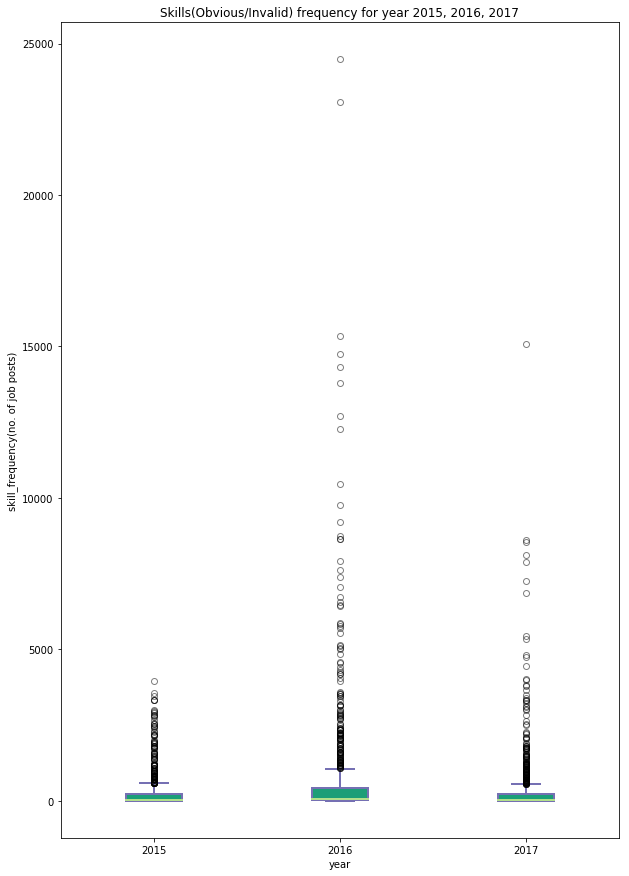

In [230]:
matplotlib_boxplot()

In [233]:
# add filter: skills frecuency < 10 over year 2015 & 2016
freq_TH = 10
filter_2015 = invalid_skills_wFrqc_df['freqcy_2015'] < freq_TH
filter_2016 = invalid_skills_wFrqc_df['freqcy_2016'] < freq_TH
filter_2017 = invalid_skills_wFrqc_df['freqcy_2017'] < freq_TH
skills_fil_df = invalid_skills_wFrqc_df[filter_2015 & filter_2016 & filter_2017].copy()
print "SKills(Obvious/Invalid) size =", invalid_skills.shape[0], "out of ", len(skillstocheck_df)
print "Skills with frequency ( less than "+str(freq_TH)+" ) = ", skills_fil_df.shape[0]
skills_fil_df.sort_values(['freqcy_2015'], ascending=True, inplace=True)
skills_fil_df

SKills(Obvious/Invalid) size = 942 out of  3818
Skills with frequency ( less than 10 ) =  182


,skill,filter_type,freqcy_2015,freqcy_2016,freqcy_2017
540,espresso machines,no_filter,0,0,1
543,excavators,no_filter,0,1,2
332,ibm spss statistics,subsuper,0,1,0
203,convincing power,subsuper,0,1,1
525,drop tables,no_filter,0,0,0
505,delivering technical training,no_filter,0,4,4
226,reality tv,subsuper,0,0,0
495,dart for publishers,no_filter,0,2,0
461,coin counting machines,no_filter,0,0,0
567,forks,no_filter,0,0,0


Skills existing in both **old & new** dictionary

* Check and (*first-level*) validate Skills existing in both **old & new** dictionary

<img src="venn.png">

* Remove skills that has been **checked**

In [174]:
intersect_skills_correct_tocheck = sorted(list(set(intersect_skills_correct) - set(checked_top15skills)))
print "*Skills intersecting both OLD and NEW LinkedIn skill dictionary"
print len(intersect_skills_correct_tocheck)
intersect_skills_correct_tocheck

*Skills intersecting both OLD and NEW LinkedIn skill dictionary
9569


['11gr2',
 '1h nmr',
 '2008 r2',
 '21 cfr',
 '24x7 production support',
 '2d animation',
 '2d art',
 '2d software',
 '360 campaigns',
 '360 feedback',
 '360 recruitment',
 '3d animation',
 '3d design',
 '3d graphics',
 '3d modeling',
 '3d modeling software',
 '3d printing',
 '3d prototyping',
 '3d reconstruction',
 '3d rendering',
 '3d scanning',
 '3d studio max',
 '3d visualization',
 '3ds max',
 '3gpp',
 '3par',
 '4pl',
 '8d problem solving',
 'a320',
 'a330',
 'ab initio',
 'abacus',
 'abap web dynpro',
 'abaqus',
 'above the line',
 'abrasives',
 'abstraction',
 'acad',
 'academic administration',
 'academic advising',
 'academic journals',
 'academic publishing',
 'academic research',
 'academic writing',
 'acceptance testing',
 'accepting responsibility',
 'access',
 'access control',
 'access control management',
 'access lists',
 'access networks',
 'access points',
 'accessibility',
 'accessories',
 'accident',
 'accident claims',
 'accident insurance',
 'accident investigatio

* Filter skills that contains **numerical** value

In [175]:
chk_itsc_skill_NUM_correct = filterNumerical(intersect_skills_correct_tocheck)
print len(chk_itsc_skill_NUM_correct)
chk_itsc_skill_NUM_correct

123


['11gr2',
 '1h nmr',
 '2008 r2',
 '21 cfr',
 '24x7 production support',
 '2d animation',
 '2d art',
 '2d software',
 '360 campaigns',
 '360 feedback',
 '360 recruitment',
 '3d animation',
 '3d design',
 '3d graphics',
 '3d modeling',
 '3d modeling software',
 '3d printing',
 '3d prototyping',
 '3d reconstruction',
 '3d rendering',
 '3d scanning',
 '3d studio max',
 '3d visualization',
 '3ds max',
 '3gpp',
 '3par',
 '4pl',
 '8d problem solving',
 'a320',
 'a330',
 'amazon ec2',
 'amazon s3',
 'api 653',
 'api 6a',
 'as400 administration',
 'as9100',
 'autocad civil 3d',
 'ax 2009',
 'axis2',
 'b2b',
 'b2b marketing',
 'b2b software',
 'b2b2c',
 'b2c',
 'b2c marketing',
 'b777',
 'c4isr',
 'cam350',
 'cdma2000',
 'cinema 4d',
 'cq5',
 'ddr3',
 'ec2',
 'fin 48',
 'force10',
 'h2s',
 'html5',
 'i2c',
 'ias 39',
 'ibm db2',
 'iec 60601',
 'iec 61850',
 'ipv4',
 'ipv6',
 'isae 3402',
 'iso 13485',
 'iso 14001',
 'iso 14971',
 'iso 17025',
 'iso 18001',
 'iso 20000',
 'iso 22000',
 'iso 27001

* Filter pair of skills with **sub/super-set** relationship

In [177]:
intersect_skills_uni_correct_tocheck = sorted(list(set(intersect_skills_correct_tocheck) & set(dict_s_onew_lower)))
intersect_skills_bi_correct_tocheck = sorted(list(set(intersect_skills_correct_tocheck) & set(dict_s_twow_lower)))
intersect_skills_tri_correct_tocheck = sorted(list(set(intersect_skills_correct_tocheck) & set(dict_s_threew_lower)))
print "*Skills intersecting both OLD and NEW LinkedIn skill dictionary"
print "\n", "Intersection Skills"
print "Uni-gram Skills:", len(intersect_skills_uni_correct_tocheck)
print "Bi-gram Skills:", len(intersect_skills_bi_correct_tocheck)
print "Tri-gram Skills:", len(intersect_skills_tri_correct_tocheck)
print "\n"
print intersect_skills_uni_correct_tocheck[:5]
print intersect_skills_bi_correct_tocheck[:5]
print intersect_skills_tri_correct_tocheck[:5]

*Skills intersecting both OLD and NEW LinkedIn skill dictionary

Intersection Skills
Uni-gram Skills: 3380
Bi-gram Skills: 5315
Tri-gram Skills: 874


['11gr2', '3gpp', '3par', '4pl', 'a320']
['1h nmr', '2008 r2', '21 cfr', '2d animation', '2d art']
['24x7 production support', '3d modeling software', '3d studio max', '8d problem solving', 'abap web dynpro']


In [181]:
itsc_subsuperset_skills_correct_tocheck = checkSubSuperSet(intersect_skills_uni_correct_tocheck, intersect_skills_bi_correct_tocheck, intersect_skills_tri_correct_tocheck)
print "*Skills intersecting both OLD and NEW LinkedIn skill dictionary"
print "SubSuperset Skills:", len(itsc_subsuperset_skills_correct_tocheck)
itsc_subsuperset_skills_correct_tocheck

*Skills intersecting both OLD and NEW LinkedIn skill dictionary
SubSuperset Skills: 3705


['access',
 'access control',
 'access lists',
 'access networks',
 'access points',
 'broadband access',
 'card access',
 'client access',
 'market access',
 'microsoft access',
 'open access',
 'remote access',
 'rope access',
 'wireless access',
 'access control management',
 'direct market access',
 'oracle access manager',
 'tivoli access manager',
 'accident',
 'accident claims',
 'accident insurance',
 'accident investigation',
 'personal accident',
 'acoustics',
 'underwater acoustics',
 'acquisitions',
 'new customer acquisitions',
 'real estate acquisitions',
 'administrative',
 'administrative assistance',
 'administrative law',
 'administrative organization',
 'administrative processes',
 'adobe',
 'adobe acrobat',
 'adobe analytics',
 'adobe connect',
 'adobe fireworks',
 'adobe illustrator',
 'adobe livecycle',
 'adobe photoshop',
 'adobe creative suite',
 'adobe experience manager',
 'adobe marketing cloud',
 'adobe premiere pro',
 'advanced',
 'advanced process control'

* Filter **Tri-gram** Skills

In [182]:
itsc_subsuperset_triskills_correct_tocheck = sorted(list(set(itsc_subsuperset_skills_correct_tocheck) & set(dict_s_threew)))
print "*Skills intersecting both OLD and NEW LinkedIn skill dictionary"
print "SubSuperset Skills:", len(itsc_subsuperset_skills_correct_tocheck)
print "\n"
print "Tri-gram Skills:", len(itsc_subsuperset_triskills_correct_tocheck)
itsc_subsuperset_triskills_correct_tocheck

*Skills intersecting both OLD and NEW LinkedIn skill dictionary
SubSuperset Skills: 3705


Tri-gram Skills: 562


['3d modeling software',
 '3d studio max',
 '8d problem solving',
 'abap web dynpro',
 'access control management',
 'active directory experience',
 'adobe creative suite',
 'adobe experience manager',
 'adobe marketing cloud',
 'adobe premiere pro',
 'adult learning theory',
 'adult stem cells',
 'advance care planning',
 'advanced process control',
 'agile project management',
 'agresso business world',
 'alternative dispute resolution',
 'amazon web services',
 'analog circuit design',
 'analytic problem solving',
 'analytical method validation',
 'application delivery controllers',
 'application performance management',
 'application security architecture',
 'assessment for learning',
 'audit command language',
 'autocad civil 3d',
 'automated software testing',
 'avaya communication manager',
 'avaya ip telephony',
 'bacterial cell culture',
 'balance sheet review',
 'bank relationship management',
 'battery management systems',
 'big data analytics',
 'blackberry enterprise serve

In [183]:
itsc_skillstocheck_df = checkSkillList(chk_itsc_skill_NUM_correct, itsc_subsuperset_skills_correct_tocheck, intersect_skills_correct_tocheck)
itsc_skillstocheck_df.to_csv(DATA_DIR + '/process_skills_index_intersection_.csv', index=False)
print itsc_skillstocheck_df.shape[0]
itsc_skillstocheck_df

9569


,skill,filter_type
0,11gr2,numerical
1,1h nmr,numerical
2,2008 r2,numerical
3,21 cfr,numerical
4,24x7 production support,numerical
5,2d animation,numerical
6,2d software,numerical
7,360 feedback,numerical
8,360 recruitment,numerical
9,3d animation,numerical


In [234]:
temp_intsc = pd.read_csv(DATA_DIR + 'process_skills_index_intersection_judgement.csv', keep_default_na=False)
temp_intsc.drop_duplicates(['skill'], inplace=True)
filter_valid = temp_intsc['valid'] != "n"
intsc_unsure_skills = temp_intsc[filter_valid]
print "SKills(unSure) size =", intsc_unsure_skills.shape[0], "out of ", itsc_skillstocheck_df.shape[0]
intsc_unsure_skills

SKills(unSure) size = 8649 out of  9569


,skill,filter_type,valid
0,11gr2,numerical,
1,1h nmr,numerical,
2,2008 r2,numerical,
3,21 cfr,numerical,
5,2d animation,numerical,
6,2d software,numerical,
7,360 feedback,numerical,
8,360 recruitment,numerical,
9,3d animation,numerical,
10,3d design,numerical,


In [239]:
filter_invalid = temp_intsc['valid'] == "n"
intsc_invalid_skills = temp_intsc[filter_invalid]
print "SKills(Obvious/Invalid) size =", intsc_invalid_skills.shape[0], "out of ", itsc_skillstocheck_df.shape[0]
intsc_invalid_skills

SKills(Obvious/Invalid) size = 920 out of  9569


,skill,filter_type,valid
4,24x7 production support,numerical,n
77,x86,numerical,n
78,access,subsuper,n
80,access lists,subsuper,n
96,accident,subsuper,n
100,personal accident,subsuper,n
103,acquisitions,subsuper,n
110,administrative processes,subsuper,n
123,advanced,subsuper,n
179,analyzer,subsuper,n


In [241]:
intsc_invalid_skills_wFrqc = list(
        intsc_invalid_skills.apply(lambda row: [row['skill'], row['filter_type'], getSkillFrequency(row['skill'], skill_count2015_dict), getSkillFrequency(row['skill'], skill_count2016_dict), getSkillFrequency(row['skill'], skill_count2017_dict)], axis=1))
intsc_invalid_skills_wFrqc_df = pd.DataFrame(intsc_invalid_skills_wFrqc, columns=['skill', 'filter_type', 'freqcy_2015', 'freqcy_2016', 'freqcy_2017'])
# invalid_skills_wFrqc_df.to_csv(DATA_DIR + '/skills_intersection_freqcy_invalid_judgement.csv', index=False)
print "SKills(Obvious/Invalid) size =", intsc_invalid_skills.shape[0], "out of ", itsc_skillstocheck_df.shape[0]
intsc_invalid_skills_wFrqc_df

SKills(Obvious/Invalid) size = 920 out of  9569


,skill,filter_type,freqcy_2015,freqcy_2016,freqcy_2017
0,24x7 production support,numerical,15,6,4
1,x86,numerical,7,92,43
2,access,subsuper,1477,3750,1651
3,access lists,subsuper,2,30,10
4,accident,subsuper,214,129,47
5,personal accident,subsuper,15,43,30
6,acquisitions,subsuper,223,135,65
7,administrative processes,subsuper,28,20,12
8,advanced,subsuper,1260,7358,4655
9,analyzer,subsuper,44,186,60


In [242]:
# add filter: skills frecuency < 10 over year 2015 & 2016
freq_TH = 10
filter_2015 = intsc_invalid_skills_wFrqc_df['freqcy_2015'] < freq_TH
filter_2016 = intsc_invalid_skills_wFrqc_df['freqcy_2016'] < freq_TH
filter_2017 = intsc_invalid_skills_wFrqc_df['freqcy_2017'] < freq_TH
skills_intsc_fil_df = intsc_invalid_skills_wFrqc_df[filter_2015 & filter_2016 & filter_2017].copy()
print "SKills(Obvious/Invalid) size =", intsc_invalid_skills.shape[0], "out of ", itsc_skillstocheck_df.shape[0]
print "Skills with frequency ( less than "+str(freq_TH)+" ) = ", skills_intsc_fil_df.shape[0]
skills_intsc_fil_df.sort_values(['freqcy_2015'], ascending=True, inplace=True)
skills_intsc_fil_df
# y2015_71338
# y2016_232021
# y2017_129322

SKills(Obvious/Invalid) size = 920 out of  9569
Skills with frequency ( less than 10 ) =  250


,skill,filter_type,freqcy_2015,freqcy_2016,freqcy_2017
460,eyebrow,no_filter,0,1,2
163,pay tv,subsuper,0,2,3
437,dynamical systems,no_filter,0,3,1
186,retirement savings,subsuper,0,0,0
297,afghanistan,no_filter,0,0,1
274,ultra low latency,subsuper,0,2,1
433,drum set,no_filter,0,0,0
229,tobacco industry,subsuper,0,2,2
672,professional cleaning,no_filter,0,1,2
322,birthday parties,no_filter,0,2,1


#### //SECTION B  [end]:

### Skills distribution across job posts

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90.]


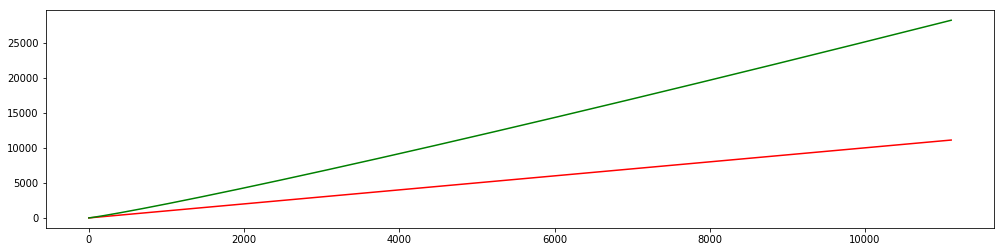

In [71]:
# example code
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 11115, 10)

print t[:10]

# modify chart size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

# red dashes, blue squares and green triangles
# plot(x, y, line_type)
plt.plot(t, t, 'r-', t, t**1.1, 'g-')
plt.show()

In [73]:
skill_count_df = pd.read_csv(APP_DATA_DIR + 'stat_skill_2016_count_new.csv', keep_default_na=False)
skill_count_dict = dict(zip(skill_count_df.skill_name, skill_count_df.jobs_count))

In [72]:
suspicious_skills_l = [s.lower() for s in suspicious_skills] # no longer in new LinkedIn source
intersect_skills_l = [s.lower() for s in intersect_skills] # still present in new LinkedIn source

In [75]:
suspicious_skills_frc_l = [skill_count_dict[str(s.lower())] for s in suspicious_skills] # no longer in new LinkedIn source (frequency)
intersect_skills_frc_l = [skill_count_dict[str(s.lower())] for s in intersect_skills] # still present in new LinkedIn source (frequency)

KeyError: '3'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 11115, 10)

# modify chart size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

# red dashes, blue squares and green triangles
# plot(x, y, line_type)
plt.plot(t, t, 'r-', t, t**1.1, 'g-')
plt.show()

In [ ]:
nodetopicskill_nskill = 11436
jobpost

#### Work with 3 years of job_posts

* count **skills occurence** for 3 years job_posts **2015 + 2016 + 2017**

In [83]:
from collections import Counter

In [84]:
def getSkillFrqc():
    jobpost_df_2015 = pd.read_csv(DATA_DIR + 'doc_index_filter.csv', keep_default_na=False)
    jobpost_df_2016 = pd.read_csv(APP_DATA_DIR + 'job_posting2016_with_skills_dict.csv', keep_default_na=False)
    jobpost_df_2017 = pd.read_csv(APP_DATA_DIR + '2017/doc_index_filtered_stop_2017.csv', keep_default_na=False)
    master_dict = []
#     2015
    for row in range(jobpost_df_2015.shape[0]):
        for skill in (jobpost_df_2015.iloc[row]['occur_skills'].split(',')):
            master_dict.append(skill)
    print "Done for 2015: nJP=", jobpost_df_2015.shape[0]
    for row in range(jobpost_df_2016.shape[0]):
        for skill in (jobpost_df_2016.iloc[row]['occur_skills'].split(',')):
            master_dict.append(skill)
    print "Done for 2016: nJP=", jobpost_df_2016.shape[0]
    for row in range(jobpost_df_2017.shape[0]):
        for skill in (jobpost_df_2017.iloc[row]['occur_skills'].split(',')):
            master_dict.append(skill)
    print "Done for 2017: nJP=", jobpost_df_2017.shape[0]

    node_skillcount_list = []
    skill_count = Counter(master_dict).most_common() # skill_count format (name, count), (name, count)

    skill_count_df = pd.DataFrame(skill_count, columns=['skill_name', 'count'])
    skill_count_df.sort_values(['count'], ascending=False, inplace=True)
    skill_count_df.to_csv(DATA_DIR + '/stat_skill_count_151617.csv', index=False)
    return skill_count_df

In [156]:
total_documents = 129322 + 232021 + 71338
print "Total_clean_jobposts =", total_documents

Total_clean_jobposts = 432681


In [85]:
skill_frequency = getSkillFrqc()
print skill_frequency.shape[0]
skill_frequency

Done for 2015: nJP= 71338
Done for 2016: nJP= 232021
Done for 2017: nJP= 129322
13193


,skill_name,count
0,interpersonal,67402
1,english,59749
2,team player,55343
3,resume,54559
4,communication skills,51327
5,analytical,43034
6,self,41121
7,computer,37287
8,player,35284
9,excel,35038


In [101]:
skills_jp151617 = sorted(skill_frequency.skill_name.tolist())

In [103]:
all_skills_OLD = sorted(dict_skilln.skill.tolist())
print len(all_skills_OLD)
all_skills_OLD

13387


['11gr2',
 '1h nmr',
 '2008 r2',
 '21 cfr',
 '23',
 '24x7 production support',
 '2d animation',
 '2d art',
 '2d software',
 '360 campaigns',
 '360 feedback',
 '360 recruitment',
 '3d animation',
 '3d design',
 '3d graphics',
 '3d max',
 '3d modeling',
 '3d modeling software',
 '3d modelling',
 '3d printing',
 '3d prototyping',
 '3d reconstruction',
 '3d rendering',
 '3d scanning',
 '3d scanning systems',
 '3d studio max',
 '3d visualization',
 '3ds max',
 '3gpp',
 '3par',
 '3pl',
 '3pl management',
 '4pl',
 '8d problem solving',
 'a320',
 'a330',
 'aac',
 'aas',
 'ab initio',
 'abacus',
 'abap',
 'abap web dynpro',
 'abaqus',
 'abinitio',
 'above the line',
 'abrasives',
 'abs',
 'absorbers',
 'abstract',
 'abstraction',
 'acad',
 'academia',
 'academic administration',
 'academic advising',
 'academic journals',
 'academic publishing',
 'academic research',
 'academic writing',
 'acca',
 'accelerometers',
 'acceptance testing',
 'accepting responsibility',
 'access',
 'access control'

* Skills(old set) that are **not present** in **2015/2016/2017** job posts

In [104]:
skills_unused151617 = sorted(list(set(all_skills_OLD) - set(skills_jp151617)))
print len(skills_unused151617)
skills_unused151617

228


['acute rehabilitation',
 'adaptive reuse',
 'aerators',
 'airbrush',
 'anchor chains',
 'angioplasty',
 'astrology',
 'asymmetric synthesis',
 'athletic performance',
 'atomic spectroscopy',
 'autohydro',
 'autolisp',
 'autotitrator',
 'avaya ip telephony',
 'avo',
 'baby products',
 'back pain',
 'band saws',
 'bandsaws',
 'benefits negotiation',
 'bible study',
 'binding machines',
 'biosecurity',
 'bloomberg software',
 'blues',
 'body armor',
 'brand positioning strategies',
 'broadway',
 'brochure production',
 'call center software',
 'calligraphy',
 'cancer treatment',
 'carbon accounting',
 'cerebral palsy',
 'chinese calligraphy',
 'claim investigation',
 'client aquisition',
 'cnc operation',
 'code enforcement',
 'coin counting machines',
 'college applications',
 'colorimeter',
 'community consultation',
 'company brochures',
 'company newsletters',
 'contract negotiating',
 'contractor liaison',
 'corporate website management',
 'corrective exercise',
 'cost center manage

In [111]:
all_skills_new_l = [s.lower() for s in all_skills_new]

* Skills(old set) that are **not present** in **2015/2016/2017** job posts, **BUT still present** in NEW LinkedIn Skill set

In [112]:
skills_unused151617_stillInNewD = sorted(list(set(skills_unused151617) & set(all_skills_new_l)))
print len(skills_unused151617_stillInNewD)
skills_unused151617_stillInNewD

146


['acute rehabilitation',
 'adaptive reuse',
 'airbrush',
 'angioplasty',
 'astrology',
 'asymmetric synthesis',
 'athletic performance',
 'atomic spectroscopy',
 'autolisp',
 'autotitrator',
 'avaya ip telephony',
 'avo',
 'baby products',
 'back pain',
 'benefits negotiation',
 'bible study',
 'biosecurity',
 'bloomberg software',
 'blues',
 'brand positioning strategies',
 'broadway',
 'brochure production',
 'calligraphy',
 'cancer treatment',
 'carbon accounting',
 'cerebral palsy',
 'chinese calligraphy',
 'claim investigation',
 'cnc operation',
 'code enforcement',
 'college applications',
 'colorimeter',
 'community consultation',
 'company brochures',
 'company newsletters',
 'contractor liaison',
 'corporate website management',
 'corrective exercise',
 'cost center management',
 'cultural heritage',
 'curatorial projects',
 'cushions',
 'defined contribution',
 'department budget management',
 'dollies',
 'drum set',
 'easements',
 'east asian studies',
 'ecg interpretation'

* Skills(old set) that are **not present** in **2015/2016/2017** job posts, **+ no longer present** in NEW LinkedIn Skill set
* Have **higher confidence** for removing

In [113]:
skills_unused151617_NotInNewD = sorted(list(set(skills_unused151617) - set(skills_unused151617_stillInNewD)))
print len(skills_unused151617_NotInNewD)
skills_unused151617_NotInNewD

82


['aerators',
 'anchor chains',
 'autohydro',
 'band saws',
 'bandsaws',
 'binding machines',
 'body armor',
 'call center software',
 'client aquisition',
 'coin counting machines',
 'contract negotiating',
 'criminal litigation',
 'distillation units',
 'document cameras',
 'drill presses',
 'drop tables',
 'end mills',
 'export development',
 'flash games',
 'force transducers',
 'forks',
 'fuel handling systems',
 'grow lights',
 'hearses',
 'hydraulic power units',
 'inspection management system',
 'intellectual property strategy',
 'intercom systems',
 'invoice software',
 'jiggers',
 'ladles',
 'leaf blowers',
 'lift trucks',
 'manual mills',
 'membership databases',
 'mooring chains',
 'multimedia journalism',
 'optical comparators',
 'oracle developer 2000',
 'oracle hyperion software',
 'passenger vehicles',
 'plumb lines',
 'post once',
 'power generation engines',
 'precision levels',
 'pressure washers',
 'pulleys',
 'reality tv',
 'rolling mills',
 'safety vests',
 'scanni